# Combine models

In [3]:
import seaborn as sns
sns.set_style('whitegrid')

import numpy as np
import scipy
import scipy.io
import scipy.sparse as sp
import csv

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

%load_ext autoreload
%autoreload 2
%matplotlib inline

from helpers import load_data

In [4]:
PREDICTION_PATH = '../data/predictions/'

In [6]:
models1 = ['mf_als_k20_l01',
          'recommend_k20_l085_50',
          'baselines',
          'mf_svd_k16',
          'mf_svd2_k11_r42',
          'mf_svd2_k12_r42'
         ]

In [11]:
models2 = ['mf_als_k20_l01',
          'recommend_k20_l085_50',
          'baselines',
          'combination_svd',
         ]

In [12]:
models = models2

i=0
submissions={}
for m in models:
    submissions[i] = load_data('{dp}{m}.csv'.format(dp=PREDICTION_PATH, m=m))
    i += 1

nonzero = submissions[0].count_nonzero()

diff_mean = np.zeros((len(models),len(models)))
diff_max = np.zeros((len(models),len(models)))
diff_min = np.zeros((len(models),len(models)))
for i in range(len(models)):
    for j in range(len(models)):
        diff_mean[i,j] = abs(submissions[i]-submissions[j]).sum() / nonzero
        diff_max[i,j] = abs(submissions[i]-submissions[j]).max()
        diff_min[i,j] = abs(submissions[i]-submissions[j]).min()

number of items: 10000, number of users: 1000
number of items: 10000, number of users: 1000
number of items: 10000, number of users: 1000
number of items: 10000, number of users: 1000


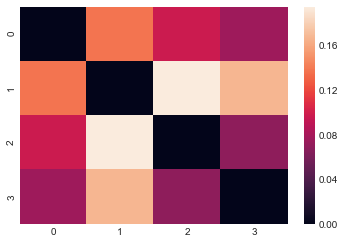

In [13]:
sns.heatmap(diff_mean)

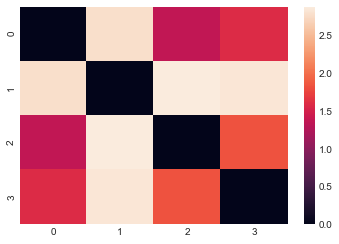

In [14]:
sns.heatmap(diff_max)

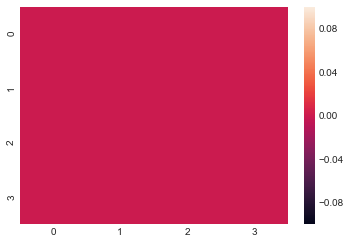

In [15]:
sns.heatmap(diff_min)

In [7]:
models = models1

i=0
submissions={}
for m in models:
    submissions[i] = load_data('{dp}{m}.csv'.format(dp=PREDICTION_PATH, m=m))
    i += 1

nonzero = submissions[0].count_nonzero()

diff_mean = np.zeros((len(models),len(models)))
diff_max = np.zeros((len(models),len(models)))
diff_min = np.zeros((len(models),len(models)))
for i in range(len(models)):
    for j in range(len(models)):
        diff_mean[i,j] = abs(submissions[i]-submissions[j]).sum() / nonzero
        diff_max[i,j] = abs(submissions[i]-submissions[j]).max()
        diff_min[i,j] = abs(submissions[i]-submissions[j]).min()

number of items: 10000, number of users: 1000
number of items: 10000, number of users: 1000
number of items: 10000, number of users: 1000
number of items: 10000, number of users: 1000
number of items: 10000, number of users: 1000
number of items: 10000, number of users: 1000
number of items: 10000, number of users: 1000


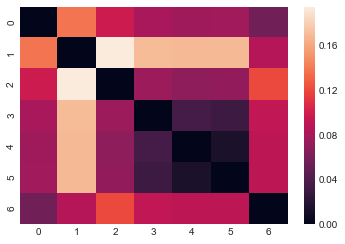

In [8]:
sns.heatmap(diff_mean)

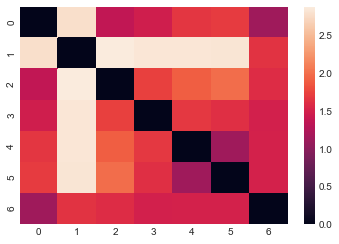

In [9]:
sns.heatmap(diff_max)

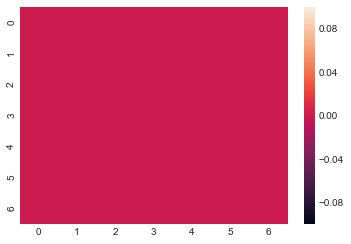

In [10]:
sns.heatmap(diff_min)